In [22]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

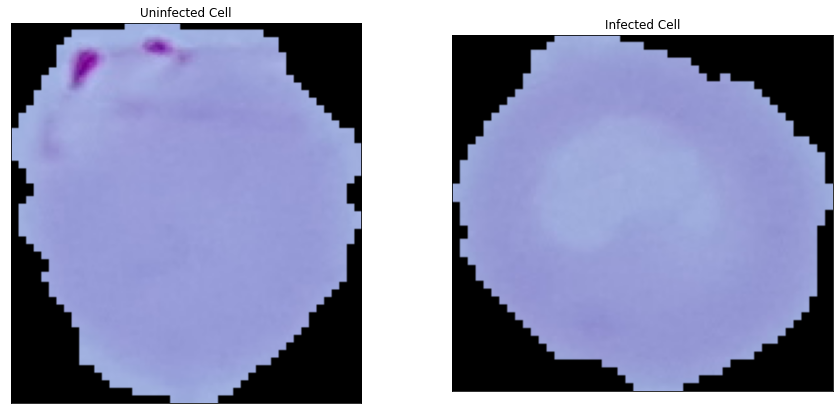

In [24]:
import cv2

Uninfected='../input/cell-images-for-detecting-malaria/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_131.png'
Parasitized='../input/cell-images-for-detecting-malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png'
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(Parasitized))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(Uninfected))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [25]:
# farkli boyuttaki resimleri tek bir boyut belirlemeliyiz

In [26]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [27]:
width, height = 128,128
trainDatagen = datagen.flow_from_directory(directory='../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                           target_size=(width,height), class_mode = 'binary', batch_size = 16, 
                                           subset='training')

valDatagen = datagen.flow_from_directory(directory='../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                           target_size=(width,height), class_mode = 'binary', batch_size = 16,
                                           subset='validation')

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


# Modelin hazırlanması

In [28]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)       

In [30]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
history = model.fit_generator(generator = trainDatagen, steps_per_epoch = len(trainDatagen), epochs =10, validation_data = valDatagen,
                              validation_steps=len(valDatagen))

Epoch 1/10
1378/1378 [==============================] - 127s 92ms/step - loss: 0.4924 - accuracy: 0.7583 - val_loss: 0.2502 - val_accuracy: 0.9221
Epoch 2/10
1378/1378 [==============================] - 126s 91ms/step - loss: 0.1962 - accuracy: 0.9403 - val_loss: 0.1704 - val_accuracy: 0.9407
Epoch 3/10
1378/1378 [==============================] - 128s 93ms/step - loss: 0.1693 - accuracy: 0.9512 - val_loss: 0.1743 - val_accuracy: 0.9481
Epoch 4/10
1378/1378 [==============================] - 127s 92ms/step - loss: 0.1560 - accuracy: 0.9552 - val_loss: 0.1731 - val_accuracy: 0.9387
Epoch 5/10
1378/1378 [==============================] - 127s 92ms/step - loss: 0.1462 - accuracy: 0.9559 - val_loss: 0.1826 - val_accuracy: 0.9490
Epoch 6/10
1378/1378 [==============================] - 128s 93ms/step - loss: 0.1354 - accuracy: 0.9579 - val_loss: 0.1741 - val_accuracy: 0.9441
Epoch 7/10
1378/1378 [==============================] - 127s 92ms/step - loss: 0.1323 - accuracy: 0.9595 - val_loss: 0

In [32]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.492430,0.758345,0.250195,0.922142
1,0.196216,0.940312,0.170410,0.940653
2,0.169262,0.951152,0.174289,0.948094
3,0.155995,0.955189,0.173113,0.938657
4,0.146212,0.955914,0.182579,0.949002
5,0.135389,0.957865,0.174060,0.944102
6,0.132319,0.959452,0.178139,0.946824
7,0.127773,0.958817,0.167680,0.939746
8,0.123097,0.961312,0.168347,0.946279
9,0.121720,0.960949,0.169825,0.941561


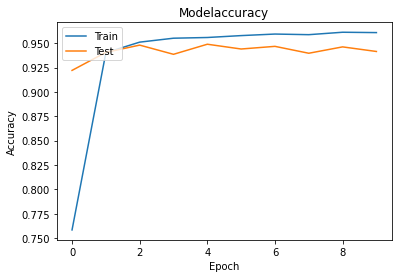

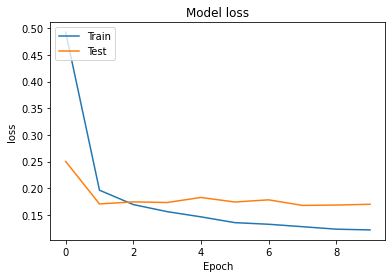

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Modelaccuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()